# NLP - Classification & Sentiment Analysis



## Dataset: Restaurant reviews

Download: https://www.kaggle.com/datasets/vigneshwarsofficial/reviews

## Goal

A restaurant chain has ordered your company a tool that can detect and answer specific reviews automatically. For this to work, you must build a model that can categorize reviews into "positive" or "negative".

## Technologies

Naive Bayes, TextBlob, selecting an appropriate file format (csv, tsv); data cleaning; tokenization, vectorization, lemmatization, stemming, n-grams.

In [184]:
#import the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

import nltk
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from textblob import classifiers
from textblob import Word, TextBlob

from textblob.classifiers import NaiveBayesClassifier
from textblob.classifiers import DecisionTreeClassifier
from textblob.classifiers import MaxEntClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

In [2]:
#nltk.download('wordnet')

In [3]:
#read in a file and create a DataFrame
df = pd.read_csv('Restaurant_Reviews.tsv',  sep="\t")

In [4]:
#set options to display all columns, rows, and characters in the DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 199)  # or 199

In [5]:
#display the first n rows of the DataFrame
df.head(10)

Review  \
0                                                                                         Wow... Loved this place.   
1                                                                                               Crust is not good.   
2                                                                        Not tasty and the texture was just nasty.   
3                          Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.   
4                                                      The selection on the menu was great and so were the prices.   
5                                                                   Now I am getting angry and I want my damn pho.   
6                                                                            Honeslty it didn't taste THAT fresh.)   
7  The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.   
8                                                                                        The fries were great too.   
9                                                                                                   A great touch.   

   Liked  
0      1  
1      0  
2      0  
3      1  
4      1  
5      0  
6      0  
7      0  
8      1  
9      1

In [6]:
#display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
#display summary statistics of the DataFrame
df.describe()

Liked
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000

## Preprocessing

In [8]:
#display the number of null values in each column
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [9]:
#display rows that are duplicates
df[df.duplicated(keep=False)]

Review  Liked
334                 I love this place.      1
380                   I won't be back.      0
383             The food was terrible.      0
505  I would not recommend this place.      0
814                 I love this place.      1
816             The food was terrible.      0
843                   I won't be back.      0
846  I would not recommend this place.      0

In [10]:
#remove duplicates from the DataFrame
df.drop_duplicates()

Review  \
0                                                                                                                  Wow... Loved this place.   
1                                                                                                                        Crust is not good.   
2                                                                                                 Not tasty and the texture was just nasty.   
3                                                   Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.   
4                                                                               The selection on the menu was great and so were the prices.   
..                                                                                                                                      ...   
995                                                                      I think food should have flavor and texture and both were lacking.   
996                                                                                                                Appetite instantly gone.   
997                                                                                      Overall I was not impressed and would not go back.   
998                                             The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.   
999  Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.   

     Liked  
0        1  
1        0  
2        0  
3        1  
4        1  
..     ...  
995      0  
996      0  
997      0  
998      0  
999      0  

[996 rows x 2 columns]

## Stopwords

In [11]:
#create a list of stopwords
stopwords_review = stopwords.words('english')

In [12]:
# Define the list of stopwords to keep
keep_stopwords = ['not', 'no', 't', "don't", "didn't", "doesn't", "hadn't", "haven't", "isn't",
                  "mustn't", "shouldn't", "wasn't", "weren't", "won't", "i", "you're", "you've",
                  "you're", "you've", "you'll", "you'd", "she's", "that'll", 'until', 'food'
                  'place', 'service']

# Create a list of stopwords to remove by excluding the stopwords we want to keep
stopwords_to_remove = [word for word in stopwords_review if word not in keep_stopwords]

In [13]:
# Complete list of stopwords
stopwords_to_remove

['me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'nor',
 'only',
 'own',

In [14]:
# Remove the stopwords from the 'Review' column
df['Review_cleaned'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() \
                                                      if word not in stopwords_to_remove]))

## Digits

In [15]:
# Extract all digits from the 'Review' column and sum them for each row
df_numbers = df['Review_cleaned'].astype(str).str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [16]:
# Print the rows that contain digits
for index in df_numbers.index:
    print(df.iloc[index])

Review            Took an hour to get our food only 4 tables in restaurant my food was Luke warm, Our sever was running around like he was totally overwhelmed.
Liked                                                                                                                                                         0
Review_cleaned                                        Took hour get food 4 tables restaurant food Luke warm, Our sever running around like totally overwhelmed.
Name: 28, dtype: object
Review            Also there are combos like a burger, fries, and beer for 23 which is a decent deal.
Liked                                                                                               1
Review_cleaned                                   Also combos like burger, fries, beer 23 decent deal.
Name: 30, dtype: object
Review            Not much seafood and like 5 strings of pasta at the bottom.
Liked                                                                       0
Review_cle

In [17]:
# Remove digits from the 'Review' column
df['Review_cleaned'] = df['Review_cleaned'].str.replace('\d+', '', regex=True)

# Print the rows that were modified
print(df.iloc[df_numbers.index])

                                                                                                                                                    Review  \
28           Took an hour to get our food only 4 tables in restaurant my food was Luke warm, Our sever was running around like he was totally overwhelmed.   
30                                                                     Also there are combos like a burger, fries, and beer for 23 which is a decent deal.   
57                                                                                             Not much seafood and like 5 strings of pasta at the bottom.   
60                                                                    At least think to refill my water before I struggle to wave you over for 10 minutes.   
70                                                             The deal included 5 tastings and 2 drinks, and Jeff went above and beyond what we expected.   
..                                                  

### Punctuation, whitespace, to lowercase, non-english words

In [18]:
# Remove punctuation from the 'Review' column
df['Review_cleaned'] = df['Review_cleaned'].str.replace('[^\w\s]', '', regex=True)

# Strip leading and trailing whitespace from the 'Review' column
df['Review_cleaned'] = df['Review_cleaned'].str.strip()

# Convert all characters in the 'Review' column to lowercase
df.loc[:, 'Review_cleaned'] = df['Review_cleaned'].str.lower()

# Keep only rows where the 'Review' column consists of ASCII characters
df = df[df['Review_cleaned'].map(lambda x: x.isascii())]
df

Review  \
0                                                                                                                  Wow... Loved this place.   
1                                                                                                                        Crust is not good.   
2                                                                                                 Not tasty and the texture was just nasty.   
3                                                   Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.   
4                                                                               The selection on the menu was great and so were the prices.   
..                                                                                                                                      ...   
995                                                                      I think food should have flavor and texture and both were lacking.   
996                                                                                                                Appetite instantly gone.   
997                                                                                      Overall I was not impressed and would not go back.   
998                                             The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.   
999  Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.   

     Liked  \
0        1   
1        0   
2        0   
3        1   
4        1   
..     ...   
995      0   
996      0   
997      0   
998      0   
999      0   

                                                                            Review_cleaned  
0                                                                          wow loved place  
1                                                                           crust not good  
2                                                                  not tasty texture nasty  
3                         stopped late may bank holiday rick steve recommendation loved it  
4                                                          the selection menu great prices  
..                                                                                     ...  
995                                                    i think food flavor texture lacking  
996                                                                appetite instantly gone  
997                                              overall i not impressed would not go back  
998               the whole experience underwhelming i think well go ninja sushi next time  
999  then i hadnt wasted enough life there poured salt wound drawing time took bring check  

[996 rows x 3 columns]

### Noise

In [19]:
from collections import Counter

# Create a list of all the words in the 'Review' column
all_words = [word for review in df['Review_cleaned'] for word in review.split()]

# Count the frequency of each word
word_counts = Counter(all_words)

# Create a dictionary of words and their frequencies, and filter it to only include words that occur once
word_noise = {word: freq for word, freq in word_counts.items() if freq == 1}
word_noise

{'bank': 1,
 'holiday': 1,
 'rick': 1,
 'steve': 1,
 'angry': 1,
 'honeslty': 1,
 'rubber': 1,
 'ahead': 1,
 'warmer': 1,
 'prompt': 1,
 'wayyy': 1,
 'cape': 1,
 'cod': 1,
 'ravoli': 1,
 'cranberrymmmm': 1,
 'disgusted': 1,
 'shocked': 1,
 'signs': 1,
 'indicate': 1,
 'cash': 1,
 'alone': 1,
 'burrittos': 1,
 'blah': 1,
 'less': 1,
 'interior': 1,
 'performed': 1,
 'rightthe': 1,
 'velvet': 1,
 'cakeohhh': 1,
 'hole': 1,
 'street': 1,
 'luke': 1,
 'sever': 1,
 'combos': 1,
 'final': 1,
 'blow': 1,
 'accident': 1,
 'happier': 1,
 'grab': 1,
 'pub': 1,
 'redeeming': 1,
 'ample': 1,
 'stupid': 1,
 'hiro': 1,
 'drag': 1,
 'whether': 1,
 'melted': 1,
 'styrofoam': 1,
 'fear': 1,
 'positive': 1,
 'provided': 1,
 'pucks': 1,
 'disgust': 1,
 'register': 1,
 'prime': 1,
 'rib': 1,
 'section': 1,
 'generic': 1,
 'firehouse': 1,
 'refreshing': 1,
 'pink': 1,
 'sunglasses': 1,
 'chow': 1,
 'mein': 1,
 'itfriendly': 1,
 'imaginative': 1,
 'flatlined': 1,
 'strings': 1,
 'bottom': 1,
 'power': 1,
 '

In [20]:
# Remove words that occur only once from the 'Review' column
df['Review_cleaned'] = df['Review_cleaned'].apply(lambda x: " ".join(word for word in x.split() if word not in word_noise))

In [21]:
df

Review  \
0                                                                                                                  Wow... Loved this place.   
1                                                                                                                        Crust is not good.   
2                                                                                                 Not tasty and the texture was just nasty.   
3                                                   Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.   
4                                                                               The selection on the menu was great and so were the prices.   
..                                                                                                                                      ...   
995                                                                      I think food should have flavor and texture and both were lacking.   
996                                                                                                                Appetite instantly gone.   
997                                                                                      Overall I was not impressed and would not go back.   
998                                             The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.   
999  Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.   

     Liked                                                      Review_cleaned  
0        1                                                     wow loved place  
1        0                                                      crust not good  
2        0                                             not tasty texture nasty  
3        1                            stopped late may recommendation loved it  
4        1                                     the selection menu great prices  
..     ...                                                                 ...  
995      0                                 i think food flavor texture lacking  
996      0                                                                gone  
997      0                           overall i not impressed would not go back  
998      0  the whole experience underwhelming i think well go sushi next time  
999      0                 then i enough life there salt time took bring check  

[996 rows x 3 columns]

#### Lemmatization

In [22]:
# Initialize the WordNet lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    """Lemmatize the input text using the WordNet lemmatizer"""
    return " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])

# Apply the lemmatization function to the 'Review_cleaned' column
df['Review_lemmatized'] = df['Review_cleaned'].apply(lemmatize_text)

#### Tokenization

In [25]:
def tokenize_text(text):
    """Tokenize the input text using the TextBlob library"""
    return TextBlob(text).words

# Apply the tokenization function to the 'Review_lemmatized' column
df["Review_tokenized"] = df["Review_lemmatized"].apply(tokenize_text)
df

Review  \
0                                                                                                                  Wow... Loved this place.   
1                                                                                                                        Crust is not good.   
2                                                                                                 Not tasty and the texture was just nasty.   
3                                                   Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.   
4                                                                               The selection on the menu was great and so were the prices.   
..                                                                                                                                      ...   
995                                                                      I think food should have flavor and texture and both were lacking.   
996                                                                                                                Appetite instantly gone.   
997                                                                                      Overall I was not impressed and would not go back.   
998                                             The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.   
999  Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.   

     Liked  \
0        1   
1        0   
2        0   
3        1   
4        1   
..     ...   
995      0   
996      0   
997      0   
998      0   
999      0   

                                                         Review_cleaned  \
0                                                       wow loved place   
1                                                        crust not good   
2                                               not tasty texture nasty   
3                              stopped late may recommendation loved it   
4                                       the selection menu great prices   
..                                                                  ...   
995                                 i think food flavor texture lacking   
996                                                                gone   
997                           overall i not impressed would not go back   
998  the whole experience underwhelming i think well go sushi next time   
999                 then i enough life there salt time took bring check   

                                                      Review_lemmatized  \
0                                                       wow loved place   
1                                                        crust not good   
2                                               not tasty texture nasty   
3                              stopped late may recommendation loved it   
4                                        the selection menu great price   
..                                                                  ...   
995                                 i think food flavor texture lacking   
996                                                                gone   
997                           overall i not impressed would not go back   
998  the whole experience underwhelming i think well go sushi next time   
999                 then i enough life there salt time took bring check   

                                                                   Review_tokenized  
0                                                               [wow, loved, place]  
1                                                                [crust, not, good]  
2                                                      [not, tasty, texture, nasty]  
3                                   [stopped, late, may, recommendation, loved, it]  
4              

In [289]:
#save preprossed dataframe
df.to_csv('preprocessed.csv', index=False)

### One-hot encoding

In [87]:
X = df['Review_lemmatized']
y = df['Liked']

In [31]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Review' column using the LabelEncoder
integer_encoded = label_encoder.fit_transform(df['Review_lemmatized'])

# Reshape the encoded array to a 2D array
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

# Print the first 10 encoded values
print('Label encoded:')
print(integer_encoded[:10])

Label encoded:
[[976]
 [101]
 [496]
 [604]
 [735]
 [501]
 [116]
 [720]
 [686]
 [  7]]


In [32]:
# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Transform the encoded array using the OneHotEncoder
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# Print the one-hot encoded array
print('One hot encoded:')
print(onehot_encoded)

One hot encoded:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Count Vectorizer

In [35]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Transform the 'Review_lemmatized' column using the CountVectorizer
bag_of_words = vectorizer.fit_transform(df['Review_lemmatized']).toarray()

# Print the bag of words representation
print(bag_of_words)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Create a dataframe of the bag-of-words representation
df_bag_of_words = pd.DataFrame(bag_of_words, columns=feature_names)
df_bag_of_words

absolutely  acknowledged  actually  added  after  again  ago  all  \
0             0             0         0      0      0      0    0    0   
1             0             0         0      0      0      0    0    0   
2             0             0         0      0      0      0    0    0   
3             0             0         0      0      0      0    0    0   
4             0             0         0      0      0      0    0    0   
..          ...           ...       ...    ...    ...    ...  ...  ...   
991           0             0         0      0      0      0    0    0   
992           0             0         0      0      0      0    0    0   
993           0             0         0      0      0      0    0    0   
994           0             0         0      0      0      0    0    0   
995           0             0         0      0      0      0    0    0   

     almost  also  although  always  amazing  ambiance  ambience  amount  an  \
0         0     0         0       0        0         0         0       0   0   
1         0     0         0       0        0         0         0       0   0   
2         0     0         0       0        0         0         0       0   0   
3         0     0         0       0        0         0         0       0   0   
4         0     0         0       0        0         0         0       0   0   
..      ...   ...       ...     ...      ...       ...       ...     ...  ..   
991       0     0         0       0        0         0         0       0   0   
992       0     0         0       0        0         0         0       0   0   
993       0     0         0       0        0         0         0       0   0   
994       0     0         0       0        0         0         0       0   0   
995       0     0         0       0        0         0         0       0   0   

     and  another  anyone  anything  anytime  anyway  appetizer  area  around  \
0      0        0       0         0        0       0          0     0       0   
1      0        0       0         0        0       0          0     0       0   
2      0        0       0         0        0       0          0     0       0   
3      0        0       0         0        0       0          0     0       0   
4      0        0       0         0        0       0          0     0       0   
..   ...      ...     ...       ...      ...     ...        ...   ...     ...   
991    0        0       0         0        0       0          0     0       0   
992    0        0       0         0        0       0          0     0       0   
993    0        0       0         0        0       0          0     0       0   
994    0        0       0         0        0       0          0     0       0   
995    0        0       0         0        0       0          0     0       0   

     arrived  ask  asked  assure  at  ate  atmosphere  attack  attentive  \
0          0    0      0       0   0    0           0       0          0   
1          0    0      0       0   0    0           0       0          0   
2          0    0      0       0   0    0           0       0          0   
3          0    0      0       0   0    0           0       0          0   
4          0    0      0       0   0    0           0       0          0   
..       ...  ...    ...     ...  ..  ...         ...     ...        ...   
991        0    0      0       0   0    0           0       0          0   
992        0    0      0       0   0    0           0       0          0   
993        0    0      0       0   0    0           0       0          0   
994        0    0      0       0   0    0           0       0          0   
995        0    0      0       0   0    0           0       0          0   

     attitude  authentic  average  avoid  away  awesome  awful  baby  bachi  \
0           0          0        0      0     0        0      0     0      0   
1           0          0        0      0     0        0      0     0      0   
2           0          0        

### Bag of N-grams

In [41]:
# Initialize the CountVectorizer with n-gram range (1, 2)
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))

# Transform the 'X' column using the n-gram vectorizer
ngrams = ngram_vectorizer.fit_transform(df['Review_lemmatized']).toarray()

# Print the n-grams
print('N-grams (1, 2):')
print(ngrams)

N-grams (1, 2):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
# Get the feature names
feature_names = ngram_vectorizer.get_feature_names_out()

# Create a dataframe of the n-grams
df_ngrams = pd.DataFrame(ngrams, columns=feature_names)
df_ngrams

absolutely  absolutely amazing  absolutely back  absolutely delicious  \
0             0                   0                0                     0   
1             0                   0                0                     0   
2             0                   0                0                     0   
3             0                   0                0                     0   
4             0                   0                0                     0   
..          ...                 ...              ...                   ...   
991           0                   0                0                     0   
992           0                   0                0                     0   
993           0                   0                0                     0   
994           0                   0                0                     0   
995           0                   0                0                     0   

     absolutely excuse  absolutely no  absolutely star  acknowledged  \
0                    0              0                0             0   
1                    0              0                0             0   
2                    0              0                0             0   
3                    0              0                0             0   
4                    0              0                0             0   
..                 ...            ...              ...           ...   
991                  0              0                0             0   
992                  0              0                0             0   
993                  0              0                0             0   
994                  0              0                0             0   
995                  0              0                0             0   

     acknowledged another  actually  actually rare  added  added bill  \
0                       0         0              0      0           0   
1                       0         0              0      0           0   
2                       0         0              0      0           0   
3                       0         0              0      0           0   
4                       0         0              0      0           0   
..                    ...       ...            ...    ...         ...   
991                     0         0              0      0           0   
992                     0         0              0      0           0   
993                     0         0              0      0           0   
994                     0         0              0      0           0   
995                     0         0              0      0           0   

     added extra  after  after disappointing  after minute  after one  \
0              0      0                    0             0          0   
1              0      0                    0             0          0   
2              0      0                    0             0          0   
3              0      0                    0             0          0   
4              0      0                    0             0          0   
..           ...    ...                  ...           ...        ...   
991            0      0                    0             0          0   
992            0      0                    0             0          0   
993            0      0                    0             0          0   
994            0      0                    0             0          0   
995            0      0                    0             0          0   

     after pulled  after review  after two  after waiting  again  ago  \
0               0             0          0              0      0    0   
1               0             0          0              0      0    0   
2               0             0          0              0      0    0   
3               0             0          0              0      0    0   
4               0             0          0              0      0    0   
..         

### TF-IDF

In [46]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the 'Review_lemmatized' column using the TfidfVectorizer
tfidf = tfidf_vectorizer.fit_transform(df['Review_lemmatized']).toarray()

# Print the TF-IDF representation
print('TF-IDF:')
print(tfidf)

TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a dataframe of the TF-IDF representation
df_tfidf = pd.DataFrame(tfidf, columns=feature_names)
df_tfidf

absolutely  acknowledged  actually  added  after  again  ago  all  \
0           0.0           0.0       0.0    0.0    0.0    0.0  0.0  0.0   
1           0.0           0.0       0.0    0.0    0.0    0.0  0.0  0.0   
2           0.0           0.0       0.0    0.0    0.0    0.0  0.0  0.0   
3           0.0           0.0       0.0    0.0    0.0    0.0  0.0  0.0   
4           0.0           0.0       0.0    0.0    0.0    0.0  0.0  0.0   
..          ...           ...       ...    ...    ...    ...  ...  ...   
991         0.0           0.0       0.0    0.0    0.0    0.0  0.0  0.0   
992         0.0           0.0       0.0    0.0    0.0    0.0  0.0  0.0   
993         0.0           0.0       0.0    0.0    0.0    0.0  0.0  0.0   
994         0.0           0.0       0.0    0.0    0.0    0.0  0.0  0.0   
995         0.0           0.0       0.0    0.0    0.0    0.0  0.0  0.0   

     almost  also  although  always  amazing  ambiance  ambience  amount   an  \
0       0.0   0.0       0.0     0.0      0.0       0.0       0.0     0.0  0.0   
1       0.0   0.0       0.0     0.0      0.0       0.0       0.0     0.0  0.0   
2       0.0   0.0       0.0     0.0      0.0       0.0       0.0     0.0  0.0   
3       0.0   0.0       0.0     0.0      0.0       0.0       0.0     0.0  0.0   
4       0.0   0.0       0.0     0.0      0.0       0.0       0.0     0.0  0.0   
..      ...   ...       ...     ...      ...       ...       ...     ...  ...   
991     0.0   0.0       0.0     0.0      0.0       0.0       0.0     0.0  0.0   
992     0.0   0.0       0.0     0.0      0.0       0.0       0.0     0.0  0.0   
993     0.0   0.0       0.0     0.0      0.0       0.0       0.0     0.0  0.0   
994     0.0   0.0       0.0     0.0      0.0       0.0       0.0     0.0  0.0   
995     0.0   0.0       0.0     0.0      0.0       0.0       0.0     0.0  0.0   

     and  another  anyone  anything  anytime  anyway  appetizer  area  around  \
0    0.0      0.0     0.0       0.0      0.0     0.0        0.0   0.0     0.0   
1    0.0      0.0     0.0       0.0      0.0     0.0        0.0   0.0     0.0   
2    0.0      0.0     0.0       0.0      0.0     0.0        0.0   0.0     0.0   
3    0.0      0.0     0.0       0.0      0.0     0.0        0.0   0.0     0.0   
4    0.0      0.0     0.0       0.0      0.0     0.0        0.0   0.0     0.0   
..   ...      ...     ...       ...      ...     ...        ...   ...     ...   
991  0.0      0.0     0.0       0.0      0.0     0.0        0.0   0.0     0.0   
992  0.0      0.0     0.0       0.0      0.0     0.0        0.0   0.0     0.0   
993  0.0      0.0     0.0       0.0      0.0     0.0        0.0   0.0     0.0   
994  0.0      0.0     0.0       0.0      0.0     0.0        0.0   0.0     0.0   
995  0.0      0.0     0.0       0.0      0.0     0.0        0.0   0.0     0.0   

     arrived  ask  asked  assure   at  ate  atmosphere  attack  attentive  \
0        0.0  0.0    0.0     0.0  0.0  0.0         0.0     0.0        0.0   
1        0.0  0.0    0.0     0.0  0.0  0.0         0.0     0.0        0.0   
2        0.0  0.0    0.0     0.0  0.0  0.0         0.0     0.0        0.0   
3        0.0  0.0    0.0     0.0  0.0  0.0         0.0     0.0        0.0   
4        0.0  0.0    0.0     0.0  0.0  0.0         0.0     0.0        0.0   
..       ...  ...    ...     ...  ...  ...         ...     ...        ...   
991      0.0  0.0    0.0     0.0  0.0  0.0         0.0     0.0        0.0   
992      0.0  0.0    0.0     0.0  0.0  0.0         0.0     0.0        0.0   
993      0.0  0.0    0.0     0.0  0.0  0.0         0.0     0.0        0.0   
994      0.0  0.0    0.0     0.0  0.0  0.0         0.0     0.0        0.0   
995      0.0  0.0    0.0     0.0  0.0  0.0         0.0     0.0        0.0   

     attitude  authentic  average  avoid  away  awesome  awful  baby  bachi  \
0         0.0        0.0      0.0    0.0   0.0      0.0    0.0   0.0    0.0   
1         0.0        0.0      0.0    0.0   0.0      0.0    0.0   0.0    0.0   
2       

# Visualizations

<AxesSubplot:xlabel='Liked', ylabel='count'>

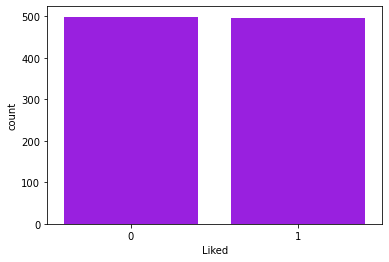

In [48]:
# Plot a countplot of the 'Liked' column
sns.countplot(x='Liked', data=df, color='#a100ff')

In [56]:
# Create dataframes for positive and negative reviews
positive_reviews = df[df["Liked"] == 1][["Review", "Liked"]]
negative_reviews = df[df["Liked"] == 0][["Review", "Liked"]]

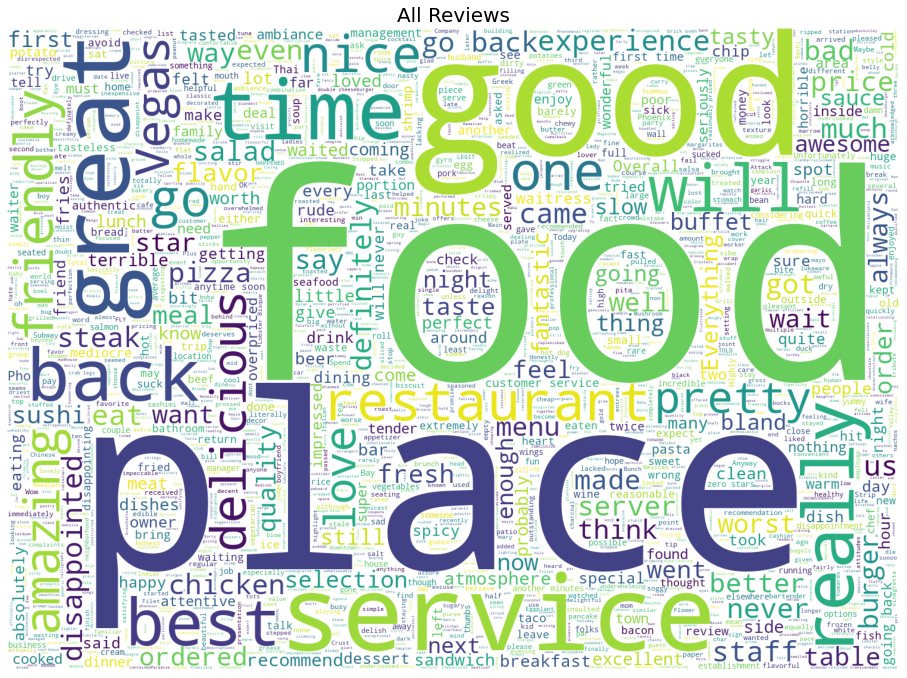

In [52]:
# Create a wordcloud of all the reviews
plt.subplots(figsize=(16,13))
all_reviews_cloud = WordCloud(
    background_color='white', max_words=10000, width=1500, stopwords=STOPWORDS,
    height=1080).generate(" ".join(df.Review))
plt.title("All Reviews", fontsize=20)
plt.imshow(all_reviews_cloud.recolor(colormap='viridis'))
plt.axis('off')
plt.show()

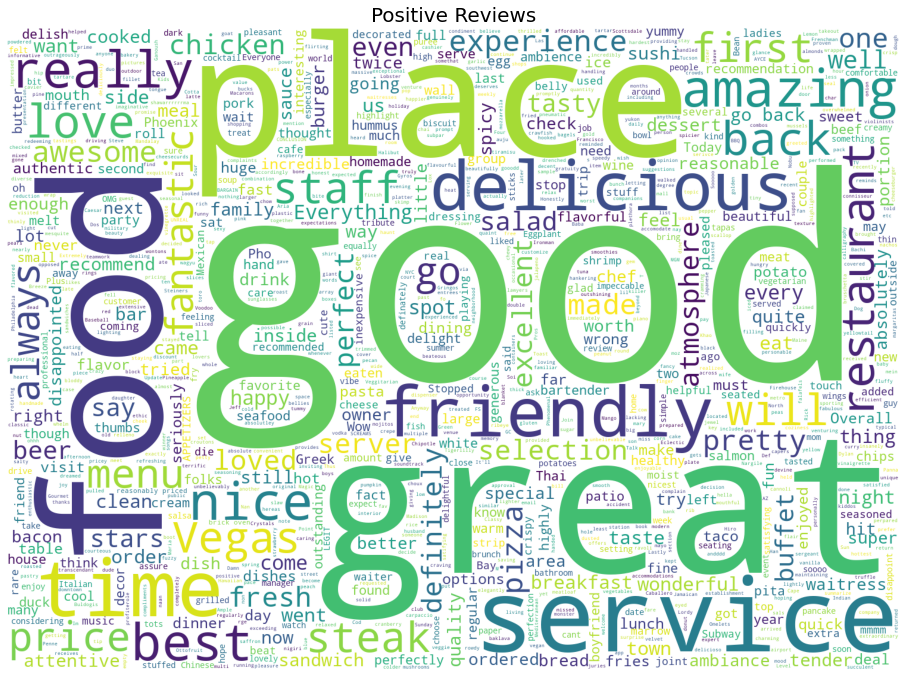

In [57]:
# Create a wordcloud of the positive reviews
plt.subplots(figsize=(16,13))
positive_reviews_cloud = WordCloud(
    background_color='white', max_words=10000, width=1500, stopwords=STOPWORDS,
    height=1080).generate(" ".join(positive_reviews.Review))
plt.title("Positive Reviews", fontsize=20)
plt.imshow(positive_reviews_cloud.recolor(colormap='viridis'))
plt.axis('off')
plt.show()

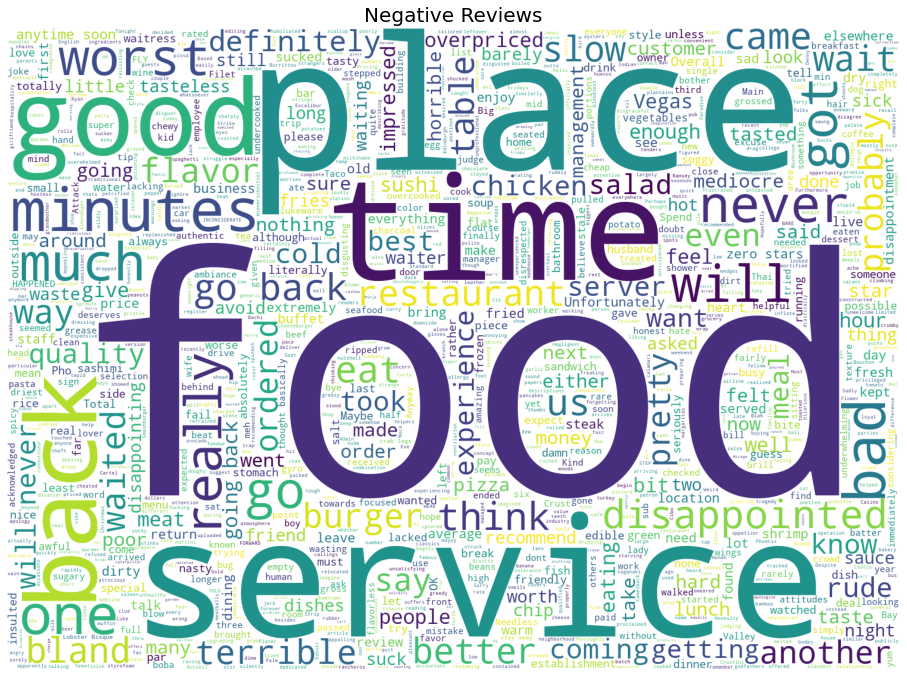

In [58]:
# Create a wordcloud of the negative reviews
plt.subplots(figsize=(16,13))
negative_reviews_cloud = WordCloud(
    background_color='white', max_words=10000, width=1500, stopwords=STOPWORDS,
    height=1080).generate(" ".join(negative_reviews.Review))
plt.title("Negative Reviews", fontsize=20)
plt.imshow(negative_reviews_cloud.recolor(colormap='viridis'))
plt.axis('off')
plt.show()

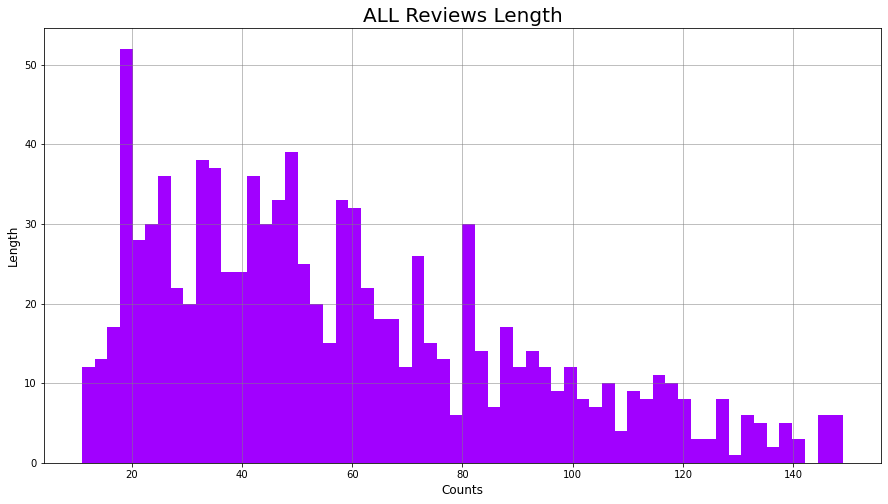

In [80]:
# Create a new column with the length of each review
df['Review_Length'] = df['Review'].apply(len)

# Plot a histogram of the review length
plt.figure()
ax = df['Review_Length'].hist(figsize=(15, 8), bins=60, color='#a100ff')
ax.tick_params(axis='x', labelsize=10);ax.tick_params(axis='y', labelsize=10, rotation=0)
ax.set_ylabel('Length', fontsize=12); ax.set_xlabel('Counts', fontsize=12)
ax.set_title('ALL Reviews Length', fontsize=20)
ax.grid(which = "major", color="gray", linewidth=0.5)
plt.show()

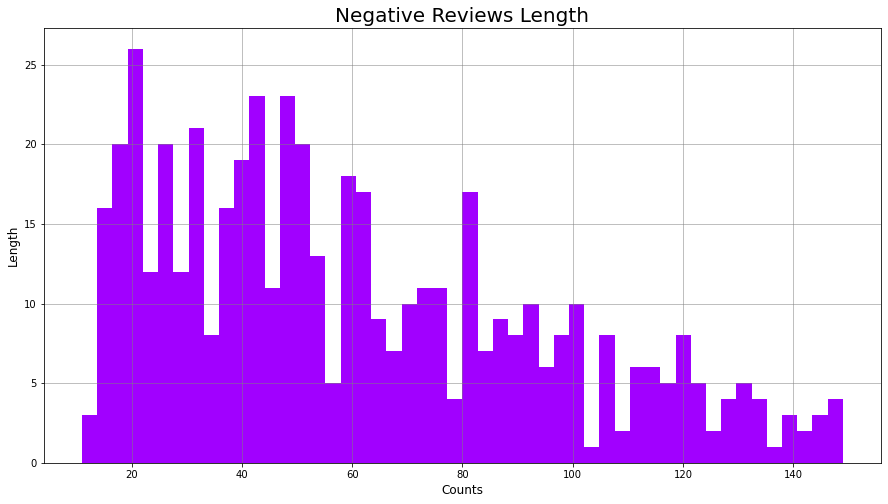

In [82]:
# Create a new column with the length of each negative review
negative_reviews['Review_Length'] = negative_reviews['Review'].apply(len)

# Plot a histogram of the negative review length
plt.figure()
ax = negative_reviews['Review_Length'].hist(figsize=(15, 8), bins=50, color='#a100ff')
ax.tick_params(axis='x', labelsize=10);ax.tick_params(axis='y', labelsize=10, rotation=0)
ax.set_ylabel('Length', fontsize=12); ax.set_xlabel('Counts', fontsize=12)
ax.set_title('Negative Reviews Length', fontsize=20)
ax.grid(which = "major", color="gray", linewidth=0.5)
plt.show()

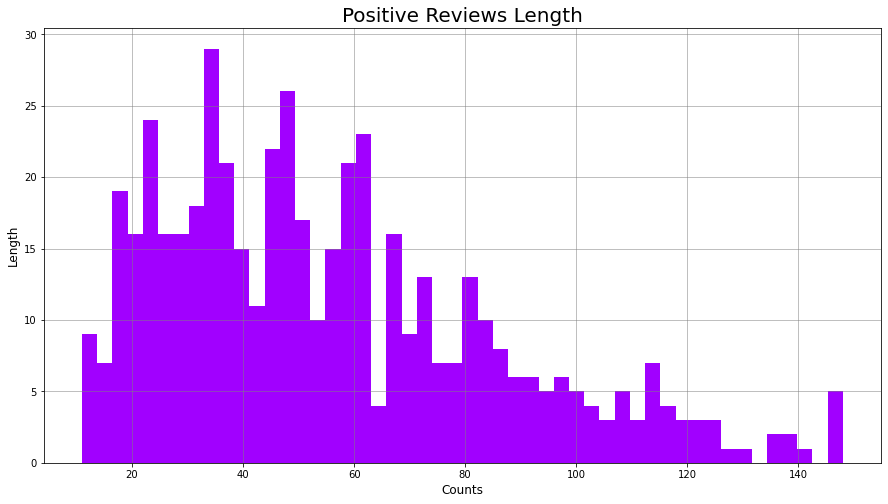

In [83]:
# Create a new column with the length of each positive review
positive_reviews['Review_Length'] = positive_reviews['Review'].apply(len)

# Plot a histogram of the positive review length
plt.figure()
ax = positive_reviews['Review_Length'].hist(figsize=(15, 8), bins=50, color='#a100ff')
ax.tick_params(axis='x', labelsize=10);ax.tick_params(axis='y', labelsize=10, rotation=0)
ax.set_ylabel('Length', fontsize=12); ax.set_xlabel('Counts', fontsize=12)
ax.set_title('Positive Reviews Length', fontsize=20)
ax.grid(which = "major", color="gray", linewidth=0.5)
plt.show()

### Naive Bayes

In [147]:
def evaluate_predictions(y_test, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Print the evaluation results for the current algorithm
    print(f'Confusion matrix: \n {cm}')
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print(f'Classification report:\n{classification_report(y_test, y_pred)}\n')
        
    # Display the confusion matrix as a plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax)

In [148]:
def evaluate_naive_bayes_models(X, y, test_size=0.2, random_state=0, algorithms=[BernoulliNB, GaussianNB, \
                                                                                 MultinomialNB]):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Dictionary to store evaluation results for each algorithm
    results = {}
    
    # Evaluate each algorithm
    for algorithm in algorithms:
        # Fit the algorithm on the training data
        model = algorithm().fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Print the evaluation results for the current algorithm
        print(f'Evaluating {algorithm.__name__}:')   
        evaluate_predictions(y_test, y_pred)
        
        # Store the accuracy score in the results dictionary
        results[algorithm.__name__] = {
            'accuracy': accuracy_score(y_test, y_pred),
        }
    return results

#### Count Vectorized Bayes

Evaluating BernoulliNB:
Confusion matrix: 
 [[72 22]
 [23 83]]
Accuracy score: 0.775
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76        94
           1       0.79      0.78      0.79       106

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.78      0.78      0.78       200


Evaluating GaussianNB:
Confusion matrix: 
 [[50 44]
 [16 90]]
Accuracy score: 0.7
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.53      0.62        94
           1       0.67      0.85      0.75       106

    accuracy                           0.70       200
   macro avg       0.71      0.69      0.69       200
weighted avg       0.71      0.70      0.69       200


Evaluating MultinomialNB:
Confusion matrix: 
 [[76 18]
 [24 82]]
Accuracy score: 0.79
Classification report:
              precisio

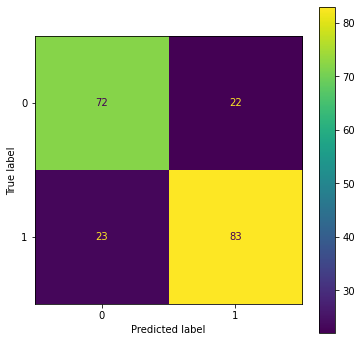

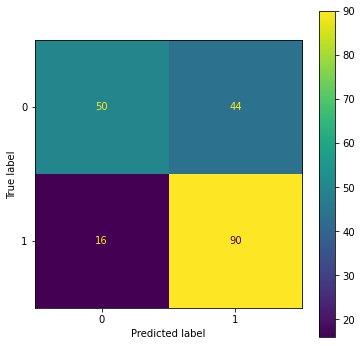

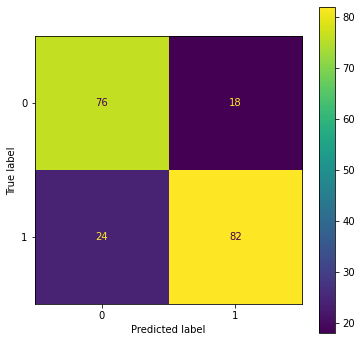

In [149]:
# Evaluate the performance of the naive Bayes models on the count vectorized data
results_count_vectorized = evaluate_naive_bayes_models(bag_of_words, y)

In [150]:
# Print the overall evaluation results
print(f"Accuracy: Count Vectorized Bayes: {results_count_vectorized}")

Accuracy: Count Vectorized Bayes: {'BernoulliNB': {'accuracy': 0.775}, 'GaussianNB': {'accuracy': 0.7}, 'MultinomialNB': {'accuracy': 0.79}}


### Bigram vectorized Bayes

Evaluating BernoulliNB:
Confusion matrix: 
 [[70 24]
 [14 92]]
Accuracy score: 0.81
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.79        94
           1       0.79      0.87      0.83       106

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200


Evaluating GaussianNB:
Confusion matrix: 
 [[59 35]
 [19 87]]
Accuracy score: 0.73
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.63      0.69        94
           1       0.71      0.82      0.76       106

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.73      0.73       200


Evaluating MultinomialNB:
Confusion matrix: 
 [[76 18]
 [19 87]]
Accuracy score: 0.815
Classification report:
              precisi

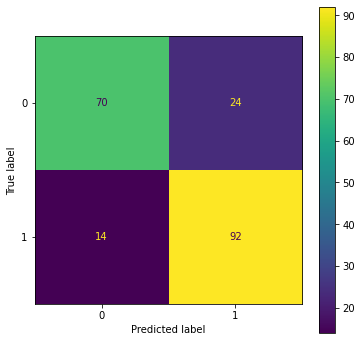

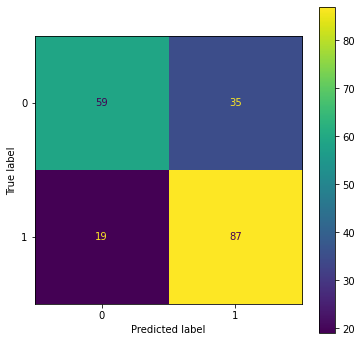

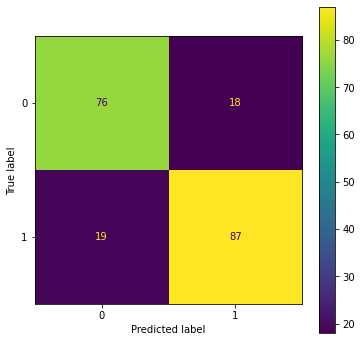

In [151]:
# Evaluate the performance of the naive Bayes models on the bigram vectorized data
results_bigrams = evaluate_naive_bayes_models(ngrams, y)

In [152]:
# Print the overall evaluation results
print(f"Accuracy: Bigram Vectorized Bayes: {results_bigrams}")

Accuracy: Bigram Vectorized Bayes: {'BernoulliNB': {'accuracy': 0.81}, 'GaussianNB': {'accuracy': 0.73}, 'MultinomialNB': {'accuracy': 0.815}}


#### TF-IDF Vectorized Bayes

Evaluating BernoulliNB:
Confusion matrix: 
 [[72 22]
 [23 83]]
Accuracy score: 0.775
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76        94
           1       0.79      0.78      0.79       106

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.78      0.78      0.78       200


Evaluating GaussianNB:
Confusion matrix: 
 [[58 36]
 [22 84]]
Accuracy score: 0.71
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        94
           1       0.70      0.79      0.74       106

    accuracy                           0.71       200
   macro avg       0.71      0.70      0.71       200
weighted avg       0.71      0.71      0.71       200


Evaluating MultinomialNB:
Confusion matrix: 
 [[78 16]
 [31 75]]
Accuracy score: 0.765
Classification report:
              precis

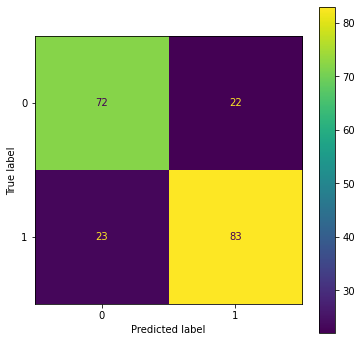

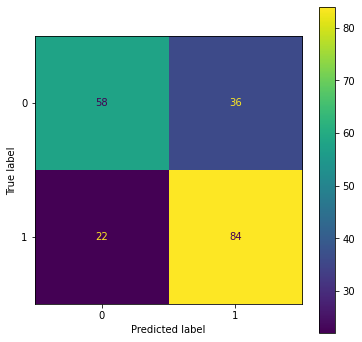

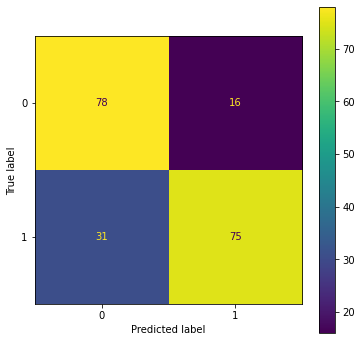

In [133]:
# Evaluate the performance of the naive Bayes models on the bigram vectorized data
results_tfidf = evaluate_naive_bayes_models(tfidf, y)

In [153]:
# Print the overall evaluation results
print(f"Accuracy: TFIDF Vectorized Bayes: {results_tfidf}")

Accuracy: TFIDF Vectorized Bayes: {'BernoulliNB': {'accuracy': 0.775}, 'GaussianNB': {'accuracy': 0.71}, 'MultinomialNB': {'accuracy': 0.765}}


### Text Blob

#### Sentiment Analysis

In [139]:
# Initialize the SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Add a column for the polarity score
df["polarity"] = df["Review_lemmatized"].apply(lambda x: sentiment_analyzer.polarity_scores(x)["compound"])

# Add a column for the sentiment label
df["sentiment"] = df["Review"].apply(lambda x: 1 if sentiment_analyzer.polarity_scores(x)["compound"] > 0 else 0)

# Display the updated DataFrame
df

Review  \
0                                                                                                                  Wow... Loved this place.   
1                                                                                                                        Crust is not good.   
2                                                                                                 Not tasty and the texture was just nasty.   
3                                                   Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.   
4                                                                               The selection on the menu was great and so were the prices.   
..                                                                                                                                      ...   
995                                                                      I think food should have flavor and texture and both were lacking.   
996                                                                                                                Appetite instantly gone.   
997                                                                                      Overall I was not impressed and would not go back.   
998                                             The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.   
999  Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.   

     Liked  \
0        1   
1        0   
2        0   
3        1   
4        1   
..     ...   
995      0   
996      0   
997      0   
998      0   
999      0   

                                                         Review_cleaned  \
0                                                       wow loved place   
1                                                        crust not good   
2                                               not tasty texture nasty   
3                              stopped late may recommendation loved it   
4                                       the selection menu great prices   
..                                                                  ...   
995                                 i think food flavor texture lacking   
996                                                                gone   
997                           overall i not impressed would not go back   
998  the whole experience underwhelming i think well go sushi next time   
999                 then i enough life there salt time took bring check   

                                                      Review_lemmatized  \
0                                                       wow loved place   
1                                                        crust not good   
2                                               not tasty texture nasty   
3                              stopped late may recommendation loved it   
4                                        the selection menu great price   
..                                                                  ...   
995                                 i think food flavor texture lacking   
996                                                                gone   
997                           overall i not impressed would not go back   
998  the whole experience underwhelming i think well go sushi next time   
999                 then i enough life there salt time took bring check   

                                                                   Review_tokenized  \
0                                                               [wow, loved, place]   
1                                                                [crust, not, good]   
2                                                      [not, tasty, texture, nasty]   
3                                   [stopped, late, may, recommendation, loved, it]   
4         

Confusion matrix: 
 [[405  94]
 [ 94 403]]
Accuracy score: 0.8112449799196787
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       499
           1       0.81      0.81      0.81       497

    accuracy                           0.81       996
   macro avg       0.81      0.81      0.81       996
weighted avg       0.81      0.81      0.81       996




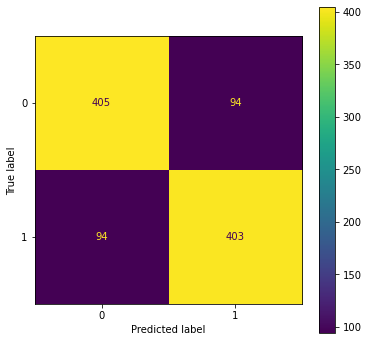

In [167]:
# show the evaluation for the sentiment analysis
evaluate_predictions(df.Liked, df.sentiment)
results_sentiment_analysis = {'accuracy': accuracy_score(df.Liked, df.sentiment),}

In [169]:
print(f"Accuracy: Sentiment Analysis: {results_sentiment_analysis}")

Accuracy: TFIDF Vectorized Bayes: {'accuracy': 0.8112449799196787}


#### Text Blob (NaiveBayes, DecisionTree)

In [161]:
def compare_classifiers(X, y, classifiers):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    train = list(zip(X_train, y_train))
    test = list(zip(X_test, y_test))
    
    results = {}
    for classifier in classifiers:
        y_pred = []  # contains future predictions
        model = classifier(train)
        # make predictions
        for item in X_test:
            out = model.classify(item)
            y_pred.append(out)

        cm = confusion_matrix(y_test, y_pred)

        print(classifier.__name__)
        print(f'Confusion Matrix:\n {cm}')
        print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
        results[classifier.__name__] = accuracy_score(y_test, y_pred)
        print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        fig, ax = plt.subplots(figsize=(6,6))
        disp.plot(ax=ax)
        
    return results

NaiveBayesClassifier
Confusion Matrix:
 [[71 23]
 [28 78]]
Accuracy Score: 0.745
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        94
           1       0.77      0.74      0.75       106

    accuracy                           0.74       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.75      0.74      0.75       200


DecisionTreeClassifier
Confusion Matrix:
 [[65 29]
 [25 81]]
Accuracy Score: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        94
           1       0.74      0.76      0.75       106

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200




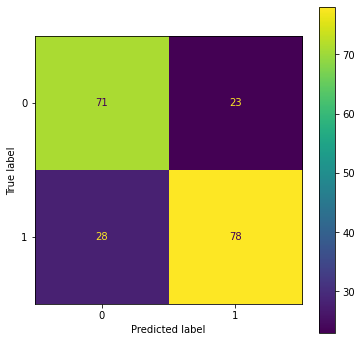

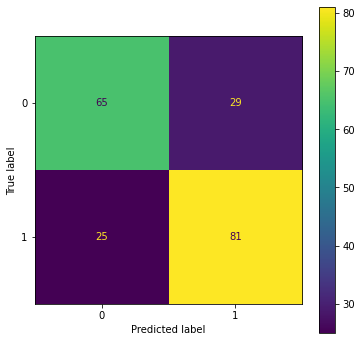

In [170]:
results_text_blob = compare_classifiers(X, y, [NaiveBayesClassifier, DecisionTreeClassifier])

In [171]:
print(f"Accuracy: Text Blob: {results_text_blob}")

{'NaiveBayesClassifier': 0.745, 'DecisionTreeClassifier': 0.73}

### XGBoost

In [172]:
def evaluate_xgboost(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Train an XGBoost classifier on the training data
    xgboost = XGBClassifier().fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = xgboost.predict(X_test)
    
    # Calculate the confusion matrix and accuracy score
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    # Print evaluation metrics
    print("XGBClassifier")
    print(f'Confusion Matrix:\n {cm}')
    print(f'Accuracy Score: {acc}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(ax=ax)
    
    return acc

XGBClassifier
Confusion Matrix:
 [[85  9]
 [27 79]]
Accuracy Score: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        94
           1       0.90      0.75      0.81       106

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200




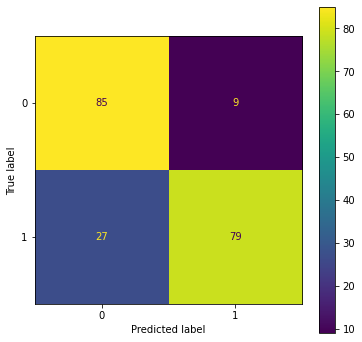

In [176]:
results_xgboost = evaluate_xgboost(bag_of_words, y)

### Hyperparameter tuning

In [177]:
def tune_xgboost(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Define the hyperparameter search space
    params = {
        'max_depth': [3, 4, 6, 10, 15],
        'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
        'gamma': [0.5, 1, 2, 5, 10],
        'subsample': np.arange(0.5, 1.0, 0.1),
        'colsample_bytree': np.arange(0.5, 1.0, 0.1),
        'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
        'n_estimators': [100, 250, 500, 750],
    }
    
    # Create an XGBoost classifier with the binary logistic objective
    xgb_clf = xgb.XGBClassifier(objective="binary:logistic")
    
    # Create a randomized search CV object using the defined hyperparameters and scoring metric
    clf = RandomizedSearchCV(
        estimator=xgb_clf,
        param_distributions=params,
        scoring='accuracy',
        n_iter=25,
        n_jobs=4,
        verbose=1
    )
    
    # Fit the randomized search CV object to the training data
    clf.fit(X_train, y_train)
    
    # Return the best combination of hyperparameters found
    return clf.best_params_
best_params = tune_xgboost(bag_of_words, y)

In [180]:
best_params

{'subsample': 0.7,
 'n_estimators': 500,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.6}

In [181]:
def evaluate_xgboost_tuned(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Train an XGBoost classifier on the training data
    xgboost = XGBClassifier(subsample = 0.7, n_estimators = 500, max_depth = 10,
                        learning_rate = 0.01, colsample_bytree = 0.5, gamma = 0.5,
                        colsample_bylevel = 0.6).fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = xgboost.predict(X_test)
    
    # Calculate the confusion matrix and accuracy score
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    # Print evaluation metrics
    print("XGBClassifier")
    print(f'Confusion Matrix:\n {cm}')
    print(f'Accuracy Score: {acc}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(ax=ax)
    
    return acc

XGBClassifier
Confusion Matrix:
 [[86  8]
 [35 71]]
Accuracy Score: 0.785
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        94
           1       0.90      0.67      0.77       106

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.78       200
weighted avg       0.81      0.79      0.78       200




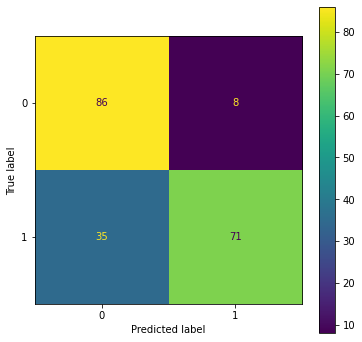

In [183]:
results_xgboost_tuned = evaluate_xgboost_tuned(bag_of_words, y)

### Support Vector Classifier

In [213]:
# Split the ngrams and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ngrams, y, test_size=0.2, random_state=0)

Support Vector Classifier
Confusion matrix:
[[81 13]
 [25 81]]
Accuracy score: 0.810
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        94
           1       0.86      0.76      0.81       106

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



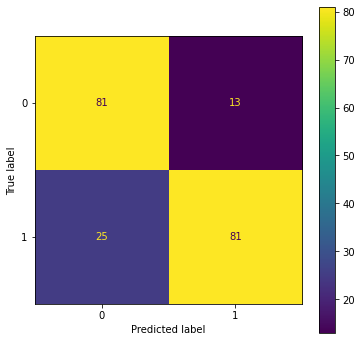

In [214]:
# Train the model
model = SVC(kernel='rbf').fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix and various evaluation metrics
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
results_SVC = accuracy_score(y_test, y_pred)

# Print the results
print("Support Vector Classifier")
print(f'Confusion matrix:\n{cm}')
print(f'Accuracy score: {results_SVC:.3f}')
print(f'Classification report:\n{report}')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)

#### Tuning hyperparameters

In [215]:
# Define the parameter grid for the grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

# Create the grid search object
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.5s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   1.5s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   1.8s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   1.4s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   1.6s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.4s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.6s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   1.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   1.5s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   1.3s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   1.3s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   1.5s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   1.5s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   1.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   1.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.7s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.7s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [216]:
# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print(f'Best parameters: {best_params}')
print(f'Best score: {best_score:.2f}')

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
Best score: 0.81


Support Vector Classifier (Tuned)
Confusion matrix:
[[81 13]
 [17 89]]
Accuracy score: 0.850
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        94
           1       0.87      0.84      0.86       106

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



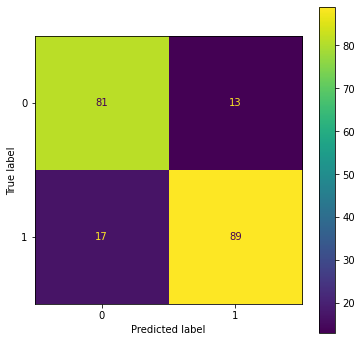

In [244]:
# Train the model with the tuned hyperparameters
model = SVC(C=100, gamma=0.001, kernel='sigmoid').fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix and various evaluation metrics
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
results_SVC_tuned = accuracy_score(y_test, y_pred)

# Print the results
print("Support Vector Classifier (Tuned)")
print(f'Confusion matrix:\n{cm}')
print(f'Accuracy score: {results_SVC_tuned:.3f}')
print(f'Classification report:\n{report}')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)

### MLP Classifier

In [282]:
# Split the ngrams and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ngrams, y, test_size=0.2, random_state=0)

MLP Classifier
Confusion matrix:
[[75 19]
 [25 81]]
Accuracy score: 0.790
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        94
           1       0.81      0.76      0.79       106

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



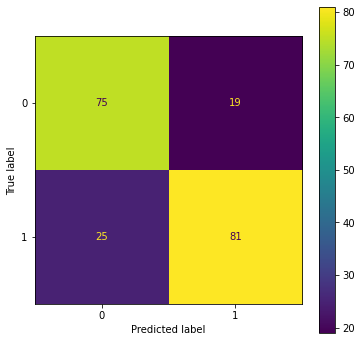

In [283]:
# Train the model
model = MLPClassifier(max_iter=10000).fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix and various evaluation metrics
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
results_MLP = accuracy_score(y_test, y_pred)

# Print the results
print("MLP Classifier")
print(f'Confusion matrix:\n{cm}')
print(f'Accuracy score: {accuracy:.3f}')
print(f'Classification report:\n{report}')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)

#### Tuning hyperparameters

In [268]:
# Define the parameter space for the randomized search
param_space = {
    'hidden_layer_sizes': [(1024), (50,), (50, 100, 50), (48,), (48, 48, 48), (96,), (144,), (192,), (96, 144, 192), (240,), (144, 192, 240)],
    'activation': ['tanh', 'logistic', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.05, 0.1, 1],
    'beta_1': [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99],
    'beta_2': [0.990, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999],
    'learning_rate': ['constant', 'adaptive'],
}

# Define the scoring metric for the randomized search
scores = ['accuracy', 'precision']

# Create the randomized search object
random_search = RandomizedSearchCV(model, param_space, n_jobs=-1, n_iter=15, cv=3, refit='precision', scoring=scores, random_state=0)

# Fit the randomized search object to the training
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=MLPClassifier(max_iter=10000), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'logistic',
                                                       'relu'],
                                        'alpha': [0.0001, 0.001, 0.05, 0.1, 1],
                                        'beta_1': [0.9, 0.91, 0.92, 0.93, 0.94,
                                                   0.95, 0.96, 0.97, 0.98,
                                                   0.99],
                                        'beta_2': [0.99, 0.991, 0.992, 0.993,
                                                   0.994, 0.995, 0.996, 0.997,
                                                   0.998, 0.999],
                                        'hidden_layer_sizes': [1024, (50,),
                                                               (50, 100, 50),
                                                               (48,),
              

In [271]:
# Output the best parameters for the randomized search
random_search.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 10000,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'estimator': MLPClassifier(max_iter=10000),
 'n_iter': 15,
 'n_jobs': -1,
 'param_distributions': {'hidden_layer_sizes': [1024,
   (50,),
   (50, 100, 50),
   (48,),
   (48, 48, 48),
   (96,),
   (144,),
   

MLP Classifier
Confusion matrix: 
 [[80 14]
 [28 78]]
Accuracy score: 0.79
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        94
           1       0.85      0.74      0.79       106

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200




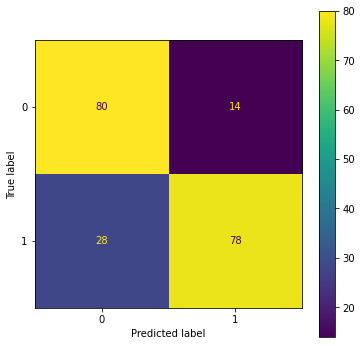

In [284]:
# Predict labels for test data using the trained model
y_pred = random_search.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute accuracy score
results_MLP_tuned = accuracy_score(y_test, y_pred)

# Print results
print("MLP Classifier")
print(f'Confusion matrix: \n {cm}')
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Classification report:\n{classification_report(y_test, y_pred)}\n')

# Create confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax)

In [285]:
print("Naive Bayes:")
print(f"Accuracy (Count vectorized): {results_count_vectorized}")
print(f"Accuracy (N-gram): {results_bigram}")
print(f"Accuracy (TF-IDF): {algorithms_tf_idf}")

print("Text Blob")
print(f"Accuracy (Sentiment Intesity Analysis): {results_sentiment_analysis}")
print(f"Accuracy (Naive Bayes): {results_text_blob}")

print("XGBoost")
print(f"Accuracy: {results_xgboost}")
print(f"Accuracy (Tuned): {results_xgboost_tuned}")

print("Support Vector Classifier")
print(f"Accuracy: {algorithms_SVC}")
print(f"Accuracy (Tuned): {algorithms_SVC_tuned}")

print("MLP")
print(f"Accuracy: {results_MLP}")
print(f"Accuracy (Tuned): {results_MLP_tuned}")


Naive Bayes:
Accuracy (Count vectorized): {'BernoulliNB': {'accuracy': 0.775}, 'GaussianNB': {'accuracy': 0.7}, 'MultinomialNB': {'accuracy': 0.79}}
Accuracy (N-gram): {'BernoulliNB': {'accuracy': 0.81}, 'GaussianNB': {'accuracy': 0.73}, 'MultinomialNB': {'accuracy': 0.815}}
Accuracy (TF-IDF): {'BernoulliNB': 0.775, 'GaussianNB': 0.71, 'MultinomialNB': 0.765}
Text Blob
Accuracy (Sentiment Intesity Analysis): {'accuracy': 0.8112449799196787}
Accuracy (Naive Bayes): {'NaiveBayesClassifier': 0.745, 'DecisionTreeClassifier': 0.73}
XGBoost
Accuracy: 0.82
Accuracy (Tuned): 0.785
Support Vector Classifier
Accuracy: 0.8
Accuracy (Tuned): 0.8
MLP
Accuracy: 0.78
Accuracy (Tuned): 0.79
